# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [92]:
 # Requests
import requests
import json
import time
from pprint import pprint

# Data Science
import pandas as pd
import numpy as np
import scipy.stats as sc

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [93]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [94]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

#run API request for each of the cities
city_weather = requests.get(city_url).json()

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | klyuchi
Processing Record 3 of Set 1 | rouyn-noranda
Processing Record 4 of Set 1 | jixi
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | abbadia san salvatore
Processing Record 7 of Set 1 | flin flon
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | creel
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | palmas
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | enewetak
Processing Record 15 of Set 1 | urengoy
Processing Record 16 of Set 1 | fruitland
Processing Record 17 of Set 1 | talovskiy
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | holualoa
Processing Record 20 of Set 1 | luena
Processing Record 21 of Set 1 | al jawf
Processing Record 22 of Set 1 | manggar
Proces

In [95]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [96]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,klyuchi,52.2667,79.1667,-9.81,89,7,2.54,RU,1732724974
1,rouyn-noranda,48.2398,-79.0288,-2.95,86,100,3.60,CA,1732724976
2,jixi,45.3000,130.9667,-15.39,97,38,1.29,CN,1732724977
3,albany,42.6001,-73.9662,6.86,59,70,3.13,US,1732724418
4,abbadia san salvatore,42.8821,11.6695,11.29,88,100,1.01,IT,1732724980


In [97]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [98]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,klyuchi,52.2667,79.1667,-9.81,89,7,2.54,RU,1732724974
1,rouyn-noranda,48.2398,-79.0288,-2.95,86,100,3.60,CA,1732724976
2,jixi,45.3000,130.9667,-15.39,97,38,1.29,CN,1732724977
3,albany,42.6001,-73.9662,6.86,59,70,3.13,US,1732724418
4,abbadia san salvatore,42.8821,11.6695,11.29,88,100,1.01,IT,1732724980


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

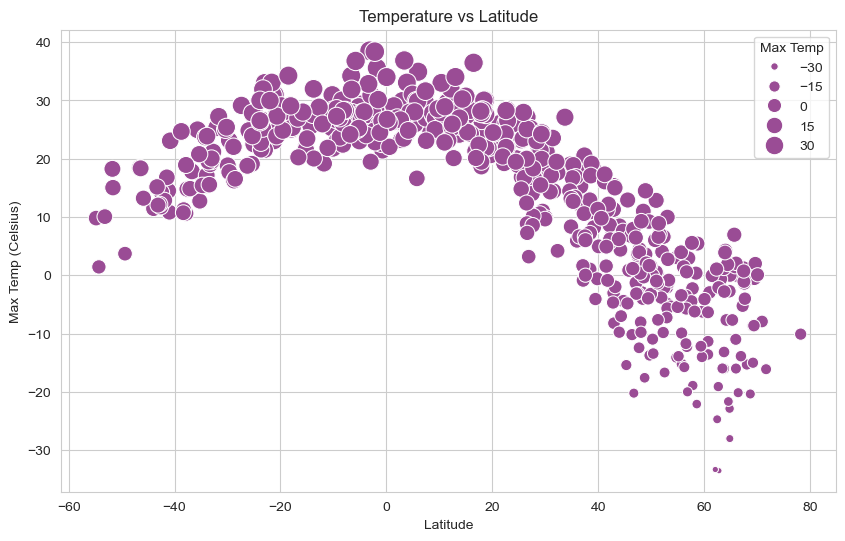

<Figure size 640x480 with 0 Axes>

In [99]:
# Build scatter plot for latitude vs. temperature

data_dict = {
    "Latitude": city_data_df['Lat'].tolist(),
    "Max Temp": city_data_df['Max Temp'].tolist()
}
weather_data = pd.DataFrame(data_dict)

# Create the scatter plot using seaborn

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Latitude', y='Max Temp',
                size='Max Temp',  # Size based on Max Temp
                sizes=(20, 200),  # Range for sizes
                data=weather_data,color="#9A4C95")
# Add titles and labels
plt.title('Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Celsius)')
plt.grid(True)

# Save the figure before showing it
plt.savefig("output_data/Fig1.png")

# Show the plot
plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

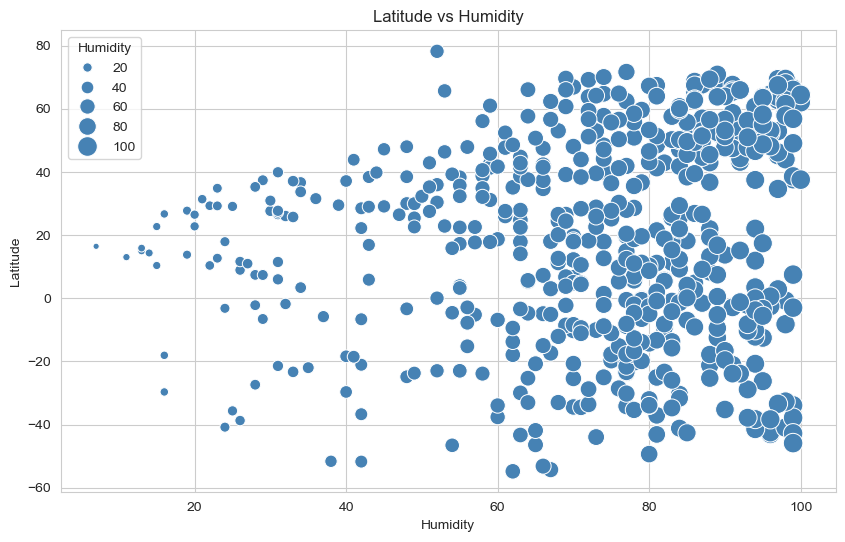

In [100]:
# Build scatter plot for latitude vs. Humidity

data_dict = {
    "Latitude": city_data_df['Lat'].tolist(),
    "Humidity": city_data_df['Humidity'].tolist()
}
weather_data = pd.DataFrame(data_dict)

# Create the scatter plot using seaborn

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Humidity', y='Latitude',
                size='Humidity',  # Size based on Max Temp
                sizes=(20, 200),  # Range for sizes
                data=weather_data,color="steelblue")
# Add titles and labels
plt.title('Latitude vs Humidity')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.grid(True)

# Save the figure before showing it
plt.savefig("output_data/Fig1.png")

# Show the plot
plt.show()


#### Latitude Vs. Cloudiness

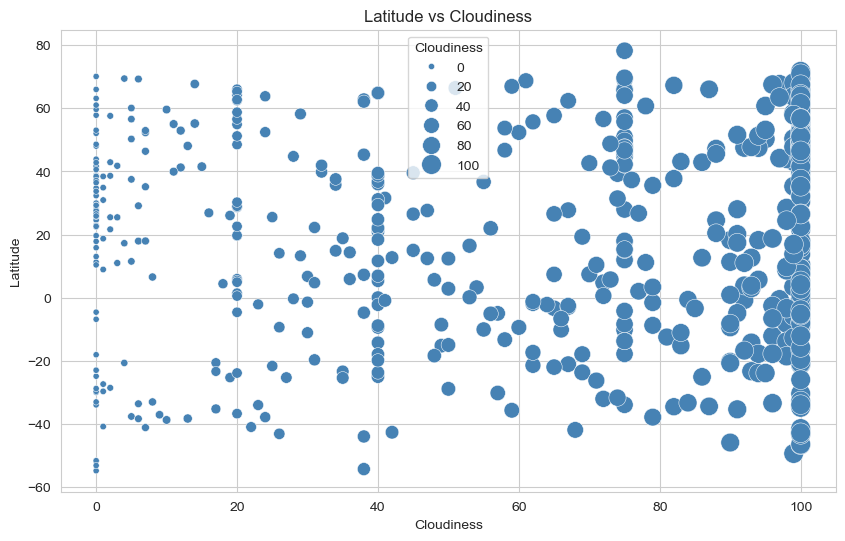

In [101]:
# Build scatter plot for latitude vs. Cloudiness

data_dict = {
    "Latitude": city_data_df['Lat'].tolist(),
    "Cloudiness": city_data_df['Cloudiness'].tolist()
}
weather_data = pd.DataFrame(data_dict)

# Create the scatter plot using seaborn

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cloudiness', y='Latitude',
                size='Cloudiness',  # Size based on Max Temp
                sizes=(20, 200),  # Range for sizes
                data=weather_data,color="steelblue")
# Add titles and labels
plt.title('Latitude vs Cloudiness')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.grid(True)

# Save the figure before showing it
plt.savefig("output_data/Fig1.png")

# Show the plot
plt.show()

#### Latitude vs. Wind Speed Plot

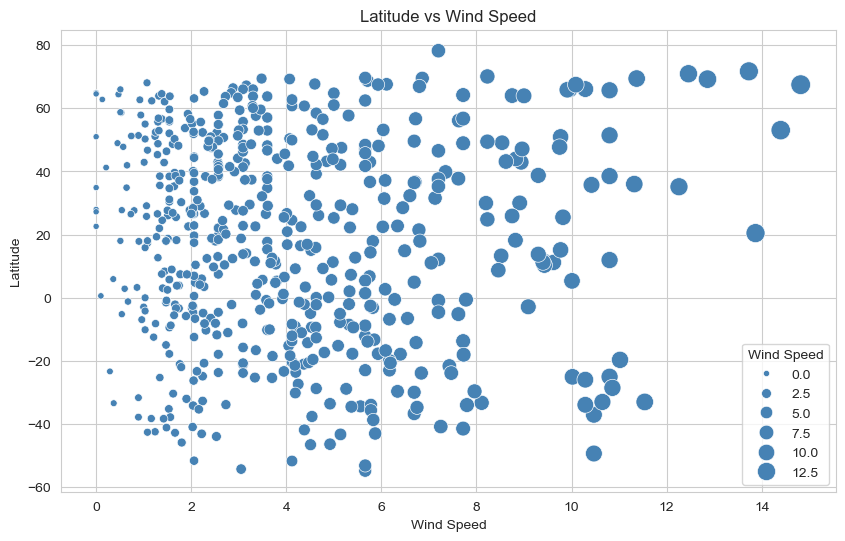

In [102]:
# Build scatter plot for latitude vs. Wind Speed


data_dict = {
    "Latitude": city_data_df['Lat'].tolist(),
    "Wind Speed": city_data_df['Wind Speed'].tolist()
}
weather_data = pd.DataFrame(data_dict)

# Create the scatter plot using seaborn

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Wind Speed', y='Latitude',
                size='Wind Speed',  # Size based on Max Temp
                sizes=(20, 200),  # Range for sizes
                data=weather_data,color="steelblue")
# Add titles and labels
plt.title('Latitude vs Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.grid(True)

# Save the figure before showing it
plt.savefig("output_data/Fig1.png")

# Show the plot
plt.show()




---

## Requirement 2: Compute Linear Regression for Each Relationship


In [124]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, x_label, y_label, annotation):
    # do regression
    (slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # these are the points/predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(rvalue)
    print(line_eq)

    # Change Canvas Size
    plt.figure(figsize=(12, 6))

    # Create a basic plot
    plt.scatter(x_values, y_values, color="skyblue", edgecolor="black", s=200)
    plt.plot(x_values, regress_values, color="black", linewidth=6) # the regression line

    # Customizations

    # Change colors
    # Add in reference lines
    # Add Labels/Title
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")

    # Add in a background grid
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

    # Annotate
    plt.annotate(line_eq, annotation, fontsize=15, color="black")

    # Show/Save the Graph
    plt.show()

In [125]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,klyuchi,52.2667,79.1667,-9.81,89,7,2.54,RU,1732724974
1,rouyn-noranda,48.2398,-79.0288,-2.95,86,100,3.60,CA,1732724976
2,jixi,45.3000,130.9667,-15.39,97,38,1.29,CN,1732724977
3,albany,42.6001,-73.9662,6.86,59,70,3.13,US,1732724418
4,abbadia san salvatore,42.8821,11.6695,11.29,88,100,1.01,IT,1732724980


In [126]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,port-aux-francais,-49.3500,70.2167,3.71,80,99,10.47,TF,1732724982
10,palmas,-10.2128,-48.3603,30.93,70,75,3.60,BR,1732724757
11,ushuaia,-54.8000,-68.3000,9.81,62,0,5.66,AR,1732724988
16,puerto natales,-51.7236,-72.4875,18.25,42,0,4.12,CL,1732724993
18,luena,-11.7833,19.9167,19.16,94,100,2.54,AO,1732724996


###  Temperature vs. Latitude Linear Regression Plot

-0.8738614955262433
y = -0.66x + 34.39


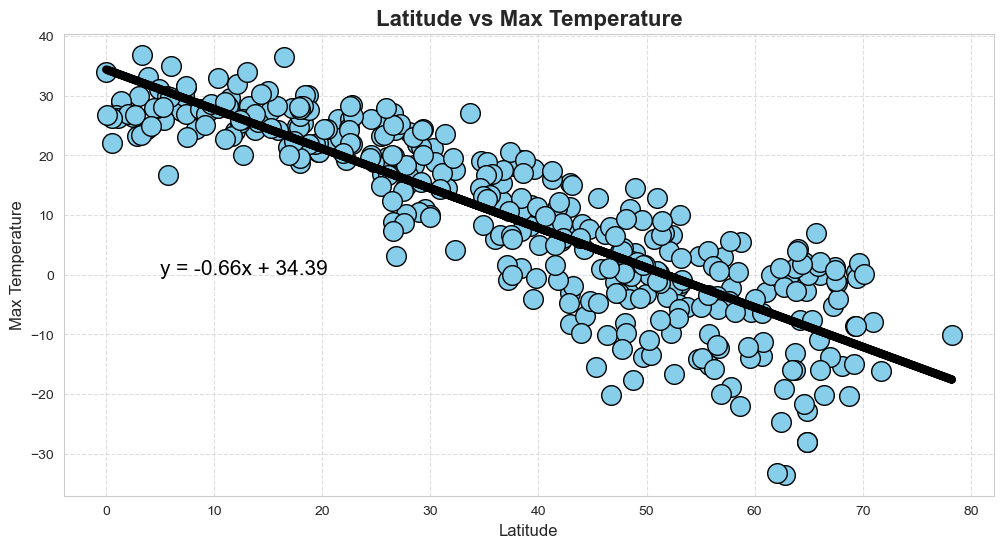

In [127]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Max Temp']
x_label = "Latitude"
y_label = "Max Temperature"
annotation = (5, 0)
plot_linear_regression(x_value, y_value, x_label, y_label, annotation)

0.729208916677921
y = 0.32x + 30.2


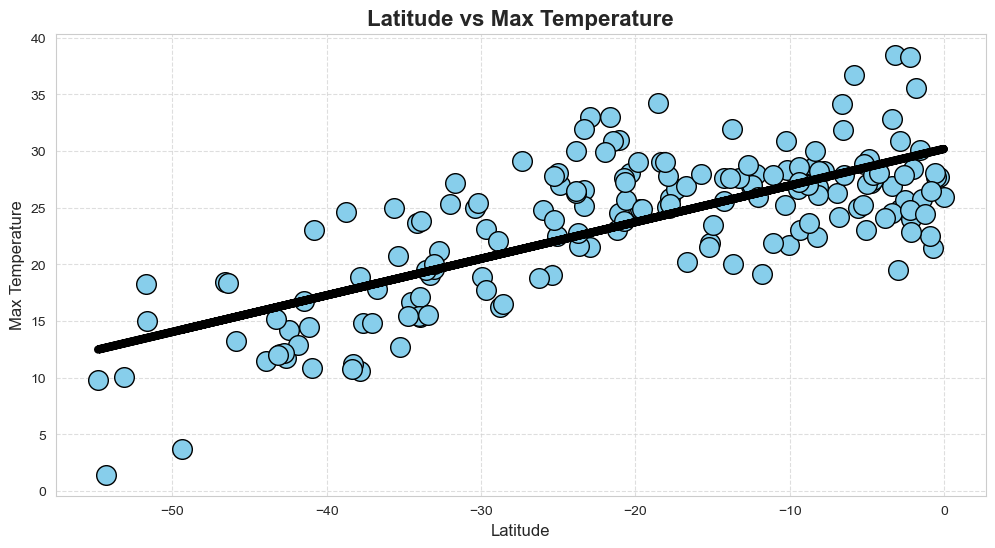

In [128]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Max Temp']
x_label = "Latitude"
y_label = "Max Temperature"
annotation = (5, 0)
plot_linear_regression(x_value, y_value, x_label, y_label, annotation)

**Discussion about the linear relationship:** The weather data comparing the latitude vs the max temperature in both hemispheres showed as follows. In the northern hemisphere as we move from the equator at 0° down towards the latitude -70 or -80 which is closer to the poles the temperature declines at an average level of around 0.87° as we move closer to the poles. In the southern hemisphere shown in the southern hemisphere regression plot we are starting at the polls again around -70 negative 80° towards the equator and 0 we can see the temperature rising gradually at about a rate of 0.72° per increase as we move towards the equator this shows a positive and a negative regression between the northern hemisphere and the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

0.35471757069096005
y = 0.39x + 57.28


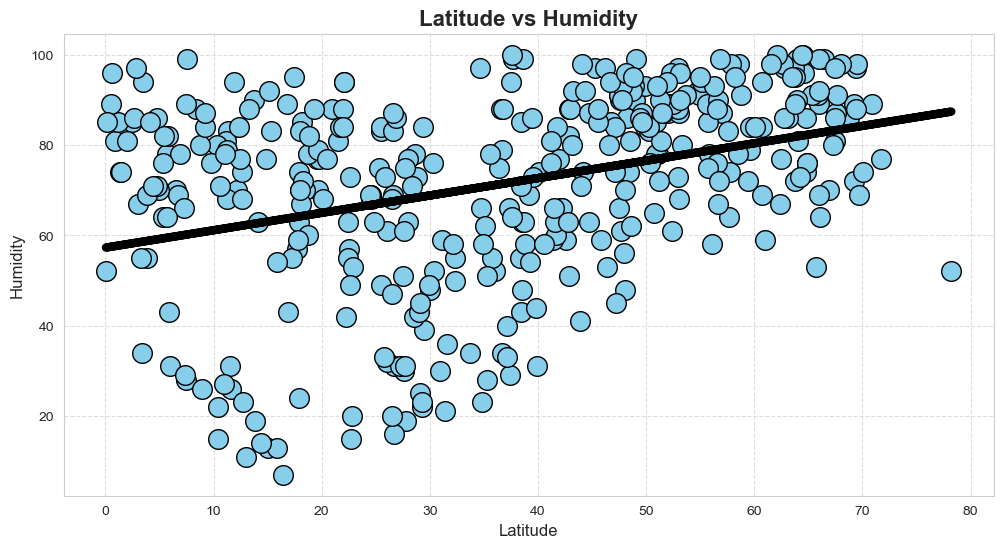

In [144]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"
annotation = (5, 0)
plot_linear_regression(x_value, y_value, x_label, y_label, annotation)

0.058219838523258446
y = 0.08x + 74.41


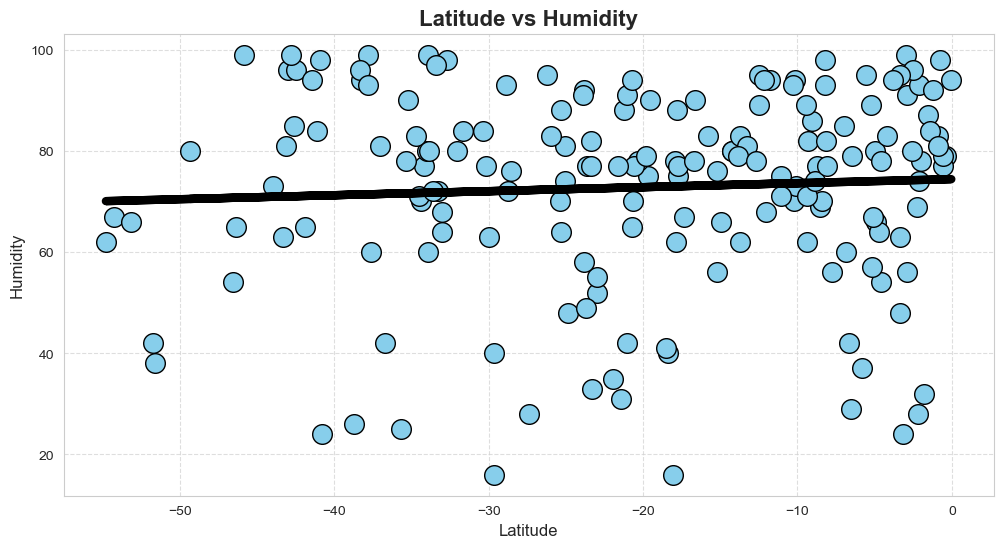

In [133]:
# Southern Hemisphere

x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"
annotation = (5, 0)
plot_linear_regression(x_value, y_value, x_label, y_label, annotation)

**Discussion about the linear relationship:** The weather comparing latitude versus humidity levels in the northern and southern hemisphere shows as follows in the northern hemisphere we as we move from 0° at the equator up into the degrees of 70 to 80 towards the poles we see a greater advancement of humidity  regression as we get further from the equator at a rate of 0.35 comparing that to the southern hemisphere we see a more even plot almost at a 90° angle with their regression rate of 0.05% which shows humidity levels change very little compared to the northern hemisphere as you head towards the poles.

### Cloudiness vs. Latitude Linear Regression Plot

0.1309849821835214
y = 0.26x + 46.97


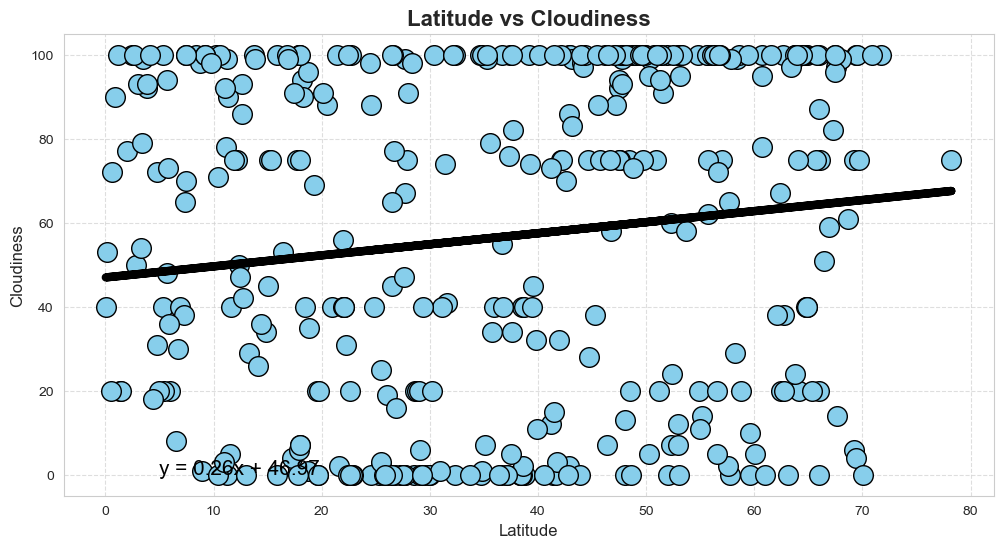

In [138]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (5, 0)
plot_linear_regression(x_value, y_value, x_label, y_label, annotation)



0.3112434887926213
y = 0.78x + 77.78


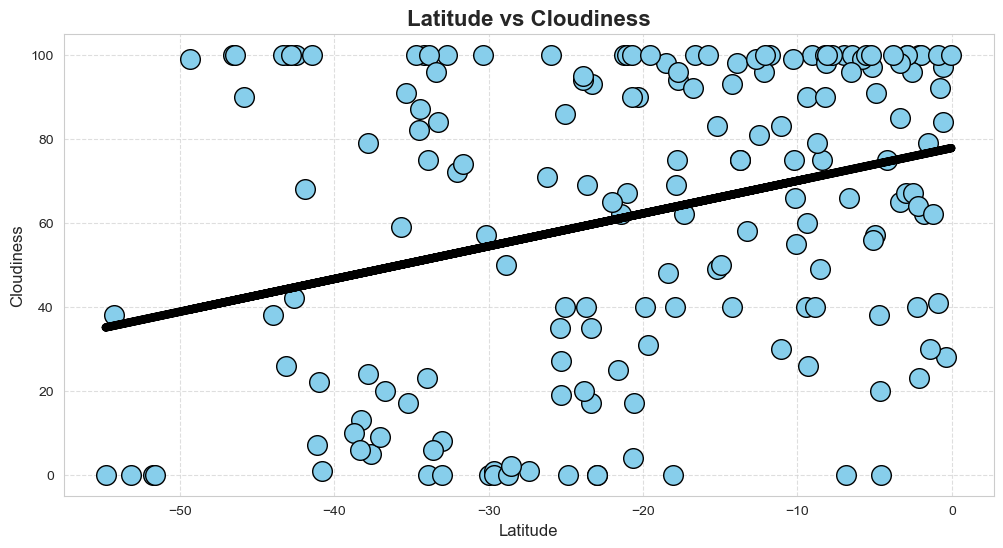

In [145]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (5, 0)
plot_linear_regression(x_value, y_value, x_label, y_label, annotation)


**Discussion about the linear relationship:** The weather comparing latitude versus cloudiness in both the hemispheres are as follows in the northern hemisphere The rate of progression from the equator at zero to 80° in the poles it's about 0.13 we can see on the chart that there appears to be less cloudy days as you are more closer to the equator and as you go up towards the poles cloud cover increases on this particular day in the southern hemisphere there is also a progression very little cloud cover at the South Pole in the -60 to -50° latitude mark and a progression rate of 0.31 with the chart showing as we move closer towards the equator the amount of cloud cover slowly increases with being at the equator at 0 it's almost 100% cloud cover at the data point selected

### Wind Speed vs. Latitude Linear Regression Plot

0.07349791932520959
y = 0.01x + 3.51


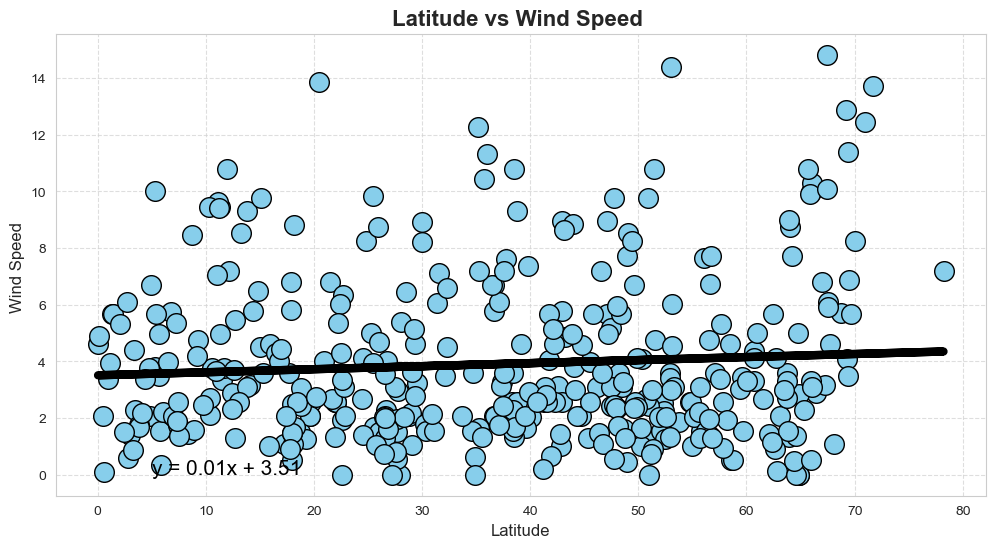

In [140]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed "
annotation = (5, 0)
plot_linear_regression(x_value, y_value, x_label, y_label, annotation)


-0.1403668145963059
y = -0.02x + 3.73


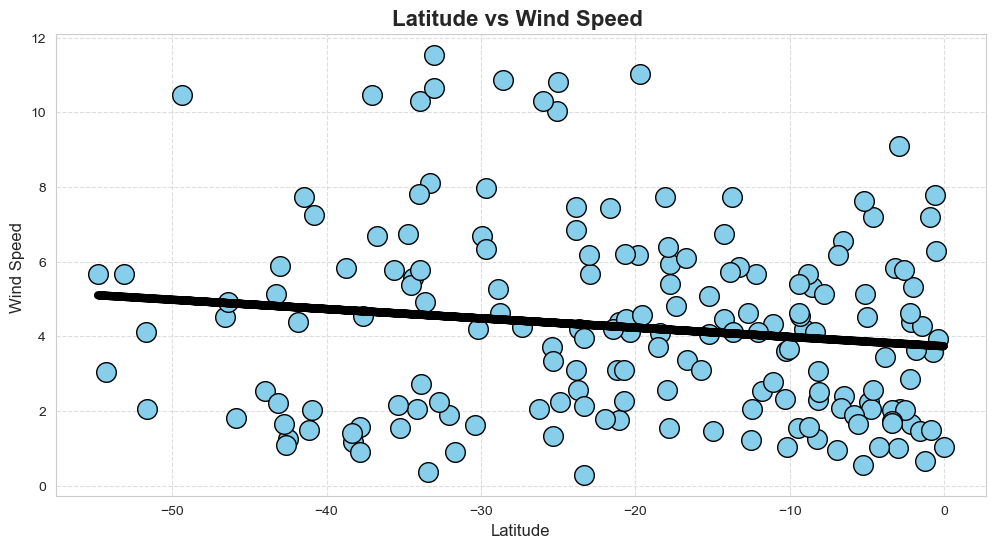

In [141]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed "
annotation = (5, 0)
plot_linear_regression(x_value, y_value, x_label, y_label, annotation)


**Discussion about the linear relationship:**
As we compare latitude versus average wind speed at the northern and southern hemispheres we can see in the northern hemisphere a slight positive progression being the progression rate of about 0.07 we can see that most wind speeds as we head towards the pole how does slight change but generally speaking little amount of change with an average wind speed of around 2 to 4 meters per second however when we compare the southern hemisphere moving from -60° at the poles towards the equator at 0 we have a regression at about 0.14 with slightly elevated wind speeds being around 4 to 6 meters per second.
